## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

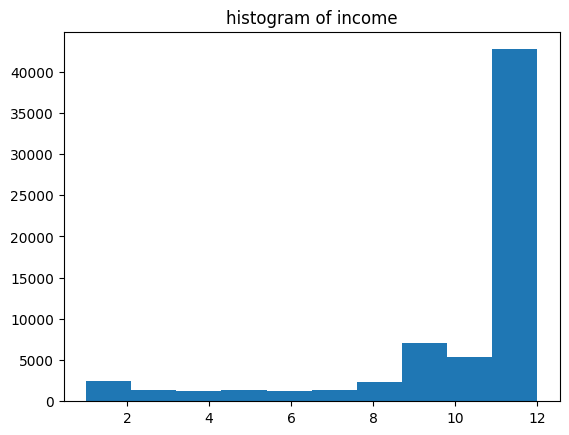

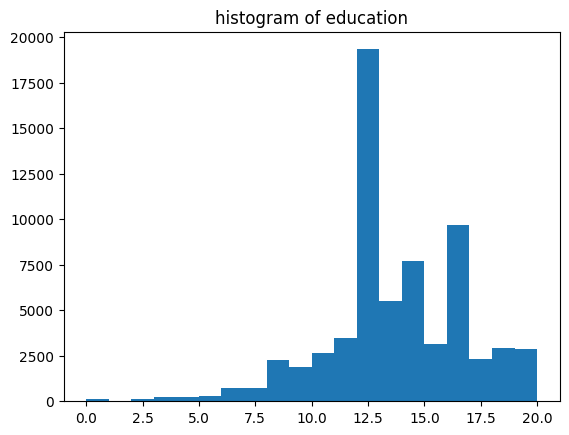

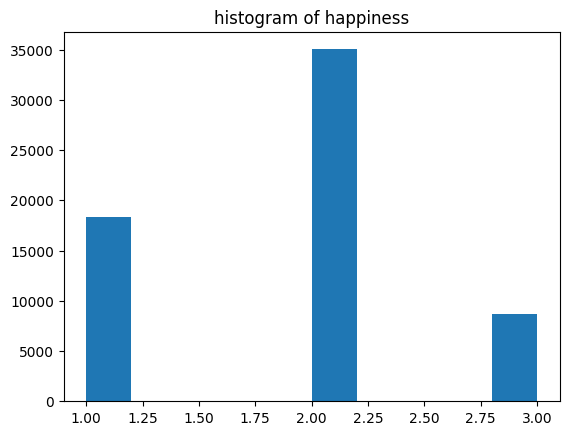

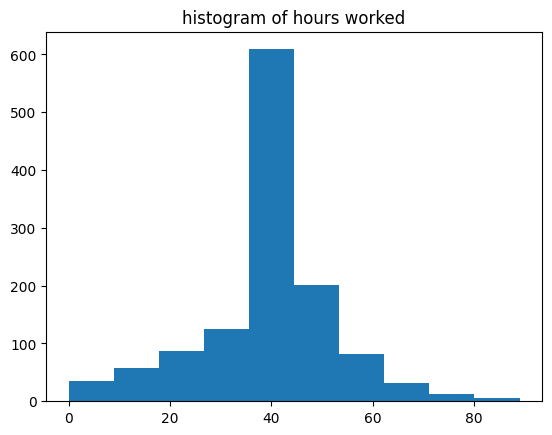

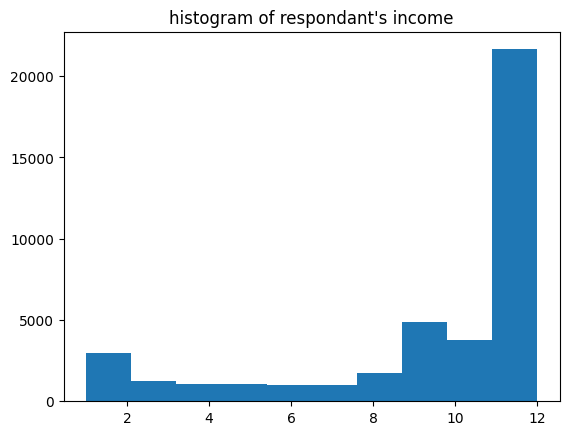

/tmp/ipython-input-309254470.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = dfc[~df['hapmar'].isin(unknowns)] #keeping subset that excluded unknowns and saved to seperate couples dataframe; same as rincome for comparison without missings.
/tmp/ipython-input-309254470.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc2 = dfc[~df['hrs2'].isin(unknowns)] #seperate subset for hours worked and hapmar


In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/data/GSS.xlsx') #read data from excel and save as dataframe

unknowns = [-100,-99,-98,-97,-90] #list of no value names

df['income'].value_counts() #checking unique values and distribution
df = df[~df['income'].isin(unknowns)] #keeping subset that excludes unknowns
df['income'].hist(grid=False) #distribution of income
plt.title('histogram of income')
plt.show()


df['educ'].value_counts() #checking unique values and distribution
df = df[~df['educ'].isin(unknowns)] #keeping subset that excludes unknowns
df['educ'].hist(bins = 20, grid=False) #distribution of education
plt.title('histogram of education')
plt.show()
#creating new column that groups education levels
dfed = df['educ']
condition = [(dfed<12),(dfed==12),(dfed>12) & (dfed<16),(dfed==16), (dfed>16)]
levels = ['Less than HS', 'HS', 'Some college', 'Bachelors', 'Beyond']
df['educ_level']=np.select(condition,levels,default = 'unknown')

df['happy'].value_counts() #checking unique values and distribution
df = df[~df['happy'].isin(unknowns)] #keeping subset that excludes unknowns
df['happy'].hist(grid = False) #distribution of happiness
plt.title('histogram of happiness')
plt.show()

df['hrs2'].value_counts() #checking unique values and distribution
df2 = df[~df['hrs2'].isin(unknowns)] #keeping subset of only those with inputs from databook excluding nulls and saved to new dataframe to conserve observations for other variables since this variable has a lot of missings.
df2['hrs2'].hist(grid=False) #distribution of hours worked
plt.title('histogram of hours worked')
plt.show()

df['rincome'].value_counts() #checking unique values and distribution
dfc = df[~df['rincome'].isin(unknowns)] #keeping subset that excluded unknowns and saved to seperate couples dataframe since there would are many missings for this variable
dfc['rincome'].hist(grid = False) #distribution of rincome
plt.title("histogram of respondant's income")
plt.show()

dfc['hapmar'].value_counts() #checking unique values and distribution
dfc = dfc[~df['hapmar'].isin(unknowns)] #keeping subset that excluded unknowns and saved to seperate couples dataframe; same as rincome for comparison without missings.

dfc2 = dfc[~df['hrs2'].isin(unknowns)] #seperate subset for hours worked and hapmar



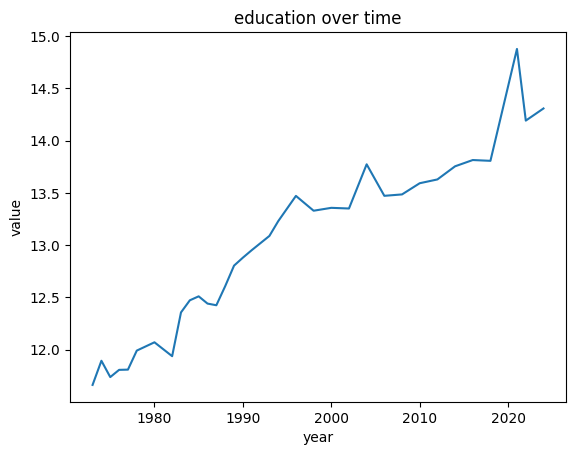

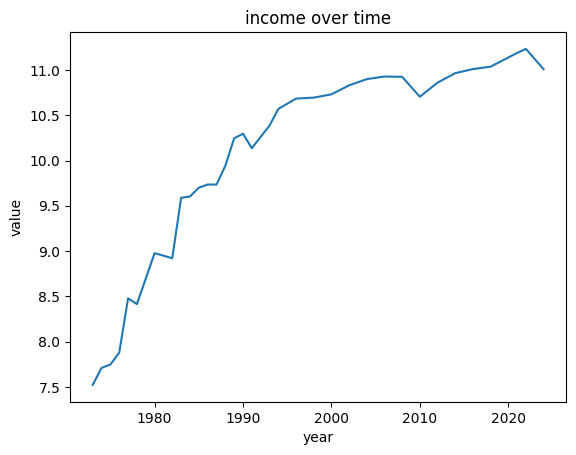

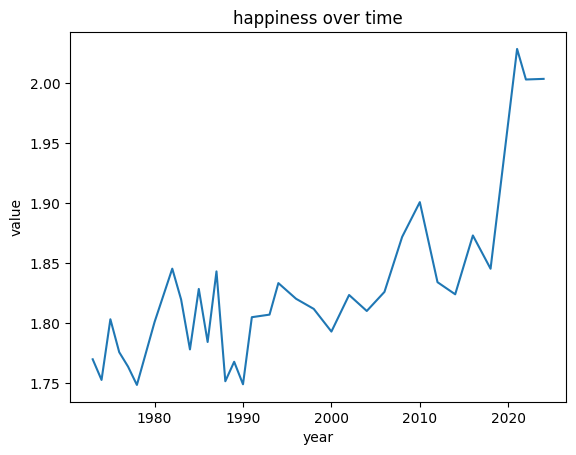

Correlations between income, education, and happiness: 
           income      educ     happy
income  1.000000  0.385122 -0.120347
educ    0.385122  1.000000 -0.070131
happy  -0.120347 -0.070131  1.000000


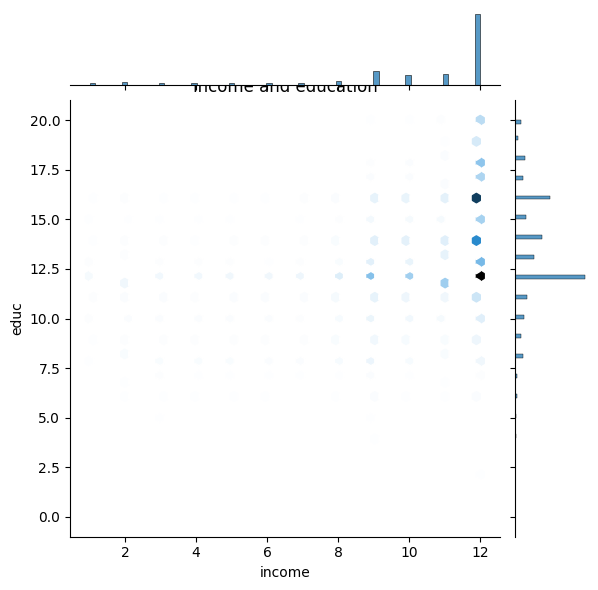

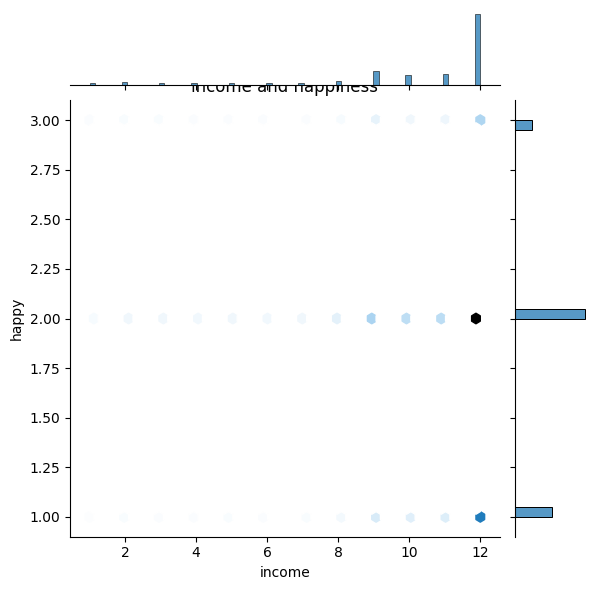

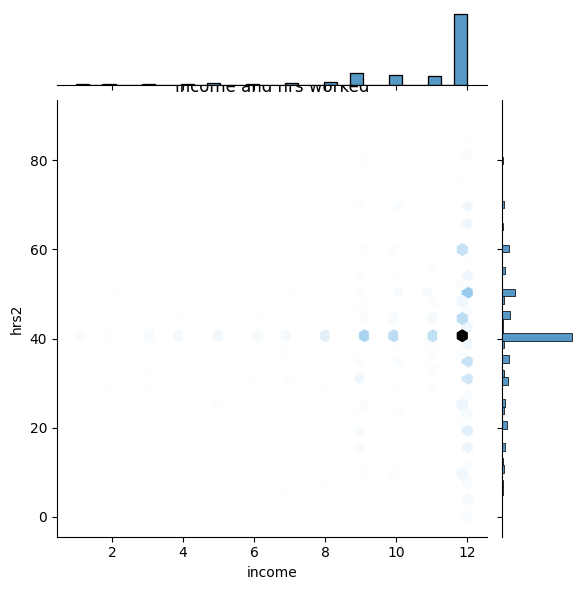

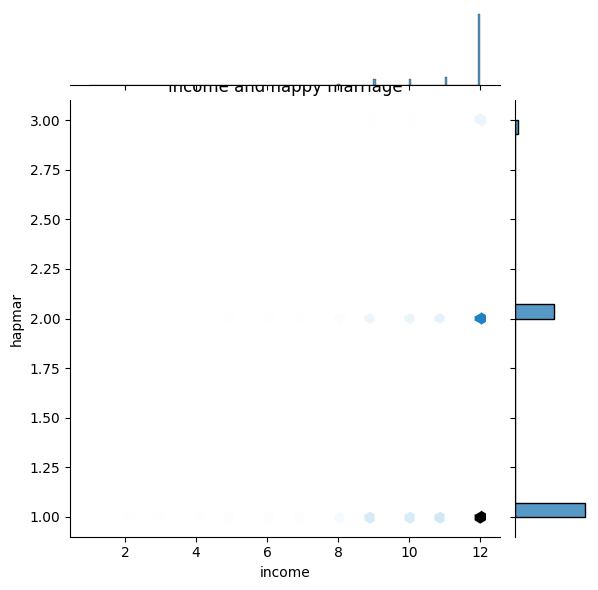

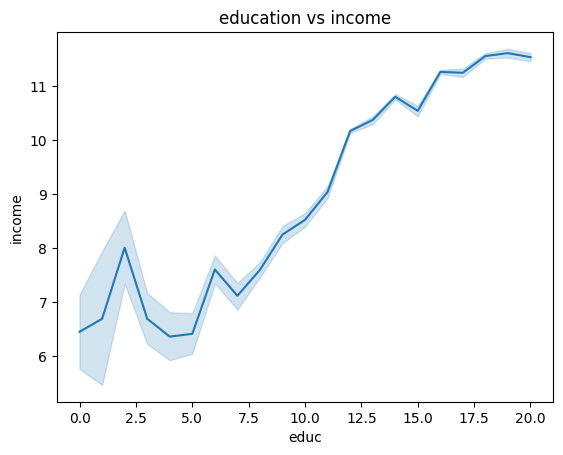

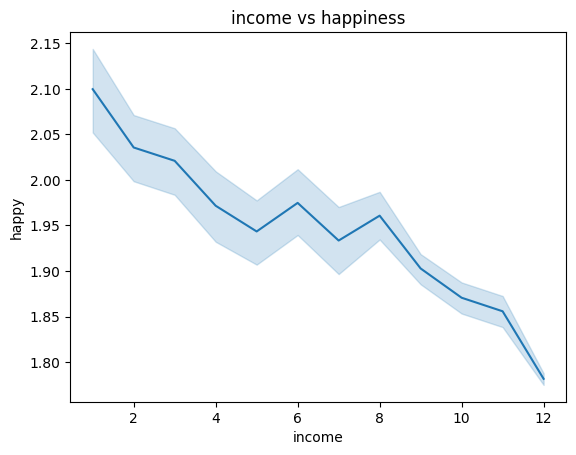

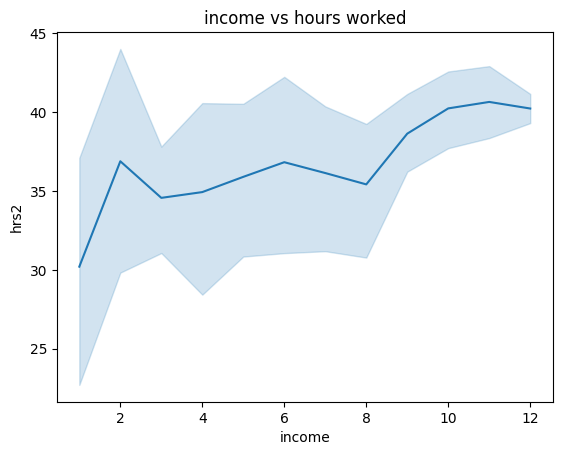

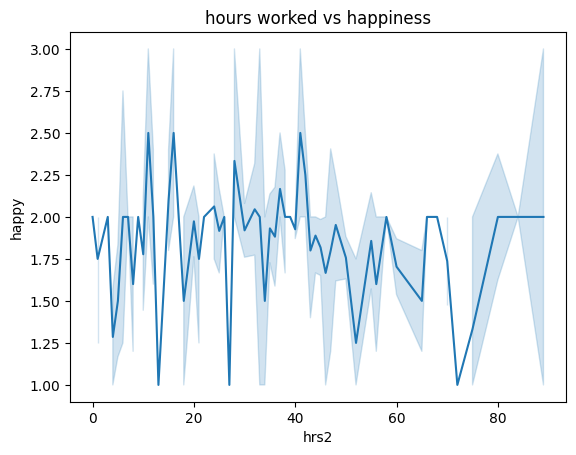

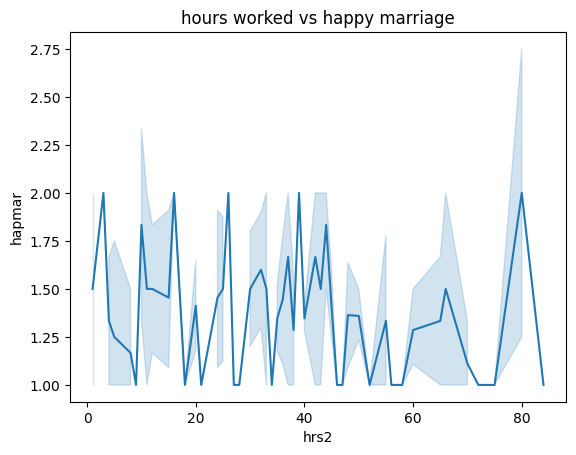

In [103]:
#creating time series of data using means of variable every year
dftm = df.drop(['id_', 'educ_level', 'hrs2', 'rincome', 'hapmar'], axis = 1)
dftm = pd.melt(dftm, id_vars = 'year')
dft = dftm.groupby(['year','variable']).mean().reset_index()

educ = dft[dft['variable'] == 'educ']
income = dft[dft['variable'] == 'income']
happy = dft[dft['variable'] == 'happy']
sns.lineplot(x = 'year', y = 'value', data = educ)
plt.title('education over time')
plt.show()
sns.lineplot(x = 'year', y = 'value', data = income)
plt.title('income over time')
plt.show()
sns.lineplot(x = 'year', y = 'value', data = happy)
plt.title('happiness over time')
plt.show()

print('Correlations between income, education, and happiness:', '\n', df.loc[:,['income','educ','happy']].corr())
sns.jointplot(x = 'income', y = 'educ', data = df, kind = 'hex')
plt.title('income and education')
plt.show()

sns.jointplot(x = 'income', y = 'happy', data = df, kind = 'hex')
plt.title('income and happiness')
plt.show()

sns.jointplot(x = 'income', y = 'hrs2', data = df2, kind = 'hex')
plt.title('income and hrs worked')
plt.show()

sns.jointplot(x = 'income', y = 'hapmar', data = dfc, kind = 'hex')
plt.title('income and happy marriage')
plt.show()

sns.lineplot(data = df, x='educ', y = 'income')
plt.title("education vs income")
plt.show()

sns.lineplot(data = df, x='income', y = 'happy')
plt.title("income vs happiness")
plt.show()

sns.lineplot(data = df2, x='income', y = 'hrs2')
plt.title("income vs hours worked")
plt.show()

sns.lineplot(data = df2, x='hrs2', y = 'happy')
plt.title("hours worked vs happiness")
plt.show()

sns.lineplot(data = dfc2, x='hrs2', y = 'hapmar')
plt.title("hours worked vs happy marriage")
plt.show()
